In [1]:
import pandas as pd
import numpy as np

### 1. Data Cleaning and Versioning:

In [14]:
data = pd.read_csv('Data/athletes.csv')

# Remove not relevant columns
data = data.dropna(subset=['region','age','weight','height','howlong','gender','eat', \
                        'train','background','experience','schedule','howlong', \
                        'deadlift','candj','snatch','backsq','experience',\
                        'background','schedule','howlong'])

data = data.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',\
                        'filthy50','fgonebad','run400','run5k','pullups','train'])

# Remove Outliers

data = data[data['weight'] < 1500]
data = data[data['gender'] != '--']
data = data[data['age'] >= 18]
data = data[(data['height'] < 96) & (data['height'] > 48)]

data = data[(data['deadlift'] > 0) & (data['deadlift'] <= 1105)|((data['gender'] == 'Female') \
            & (data['deadlift'] <= 636))]
data = data[(data['candj'] > 0) & (data['candj'] <= 395)]
data = data[(data['snatch'] > 0) & (data['snatch'] <= 496)]
data = data[(data['backsq'] > 0) & (data['backsq'] <= 1069)]

# Clean Survey Data

decline_dict = {'Decline to answer|': np.nan}
data = data.replace(decline_dict)
data = data.dropna(subset=['background','experience','schedule','howlong','eat'])

data.to_csv('Data/athlete_v2.csv', index=False)

In [14]:
# Load the data
data_v1 = pd.read_csv('Data/athletes.csv')
data_v2 = pd.read_csv('Data/athlete_v2.csv')

# Print the column names
print("Columns in v1 dataset:", data_v1.columns.tolist())
print("Columns in v2 dataset:", data_v2.columns.tolist())

Columns in v1 dataset: ['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'eat', 'train', 'background', 'experience', 'schedule', 'howlong']
Columns in v2 dataset: ['region', 'gender', 'age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq', 'eat', 'background', 'experience', 'schedule', 'howlong']


In [15]:
from sklearn.model_selection import train_test_split

# Load dataset
def load_and_preprocess_data(file_name):
    data = pd.read_csv(file_name)
    data['total_lift'] = data['candj'] + data['snatch'] + data['deadlift']  # Calculate total_lift
    return data

# Split data into train and test
def split_data(data):
    # Drop rows with NaN in 'total_lift'
    data = data.dropna(subset=['total_lift'])
    
    features = data.drop('total_lift', axis=1)
    target = data['total_lift']
    return train_test_split(features, target, test_size=0.2, random_state=42)

# For v1 dataset
data_v1 = load_and_preprocess_data('Data/athletes.csv')
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = split_data(data_v1)

# For v2 dataset (in case you want to use it later)
data_v2 = load_and_preprocess_data('Data/athlete_v2.csv')
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = split_data(data_v2)


### 2. Exploratory Data Analysis (EDA) on v1:

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_v1['total_lift'] = data_v1['candj'] + data_v1['snatch'] + data_v1['deadlift']

# Statistical Summaries:
print(data_v1.describe())

# Check for missing values:
print(data_v1.isnull().sum())

          athlete_id            age        height         weight  \
count  423003.000000  331110.000000  1.598690e+05  229890.000000   
mean   292748.166538      32.516750  1.206217e+02     170.896137   
std    184969.660327       7.730671  2.097995e+04      58.379799   
min        82.000000      13.000000  0.000000e+00       1.000000   
25%    135091.500000      27.000000  6.600000e+01     145.000000   
50%    275839.000000      31.000000  6.900000e+01     170.000000   
75%    473188.000000      37.000000  7.200000e+01     192.000000   
max    633083.000000     125.000000  8.388607e+06   20175.000000   

               fran         helen         grace      filthy50      fgonebad  \
count  5.542600e+04  3.027900e+04  4.074500e+04  1.935900e+04  2.973800e+04   
mean   9.886691e+02  1.207950e+03  5.766025e+02  2.127863e+03  1.472252e+03   
std    7.200430e+04  6.824091e+04  4.891145e+04  6.055021e+04  9.762688e+04   
min    1.000000e+00  1.000000e+00 -6.000000e+01  1.000000e+00  0.000000

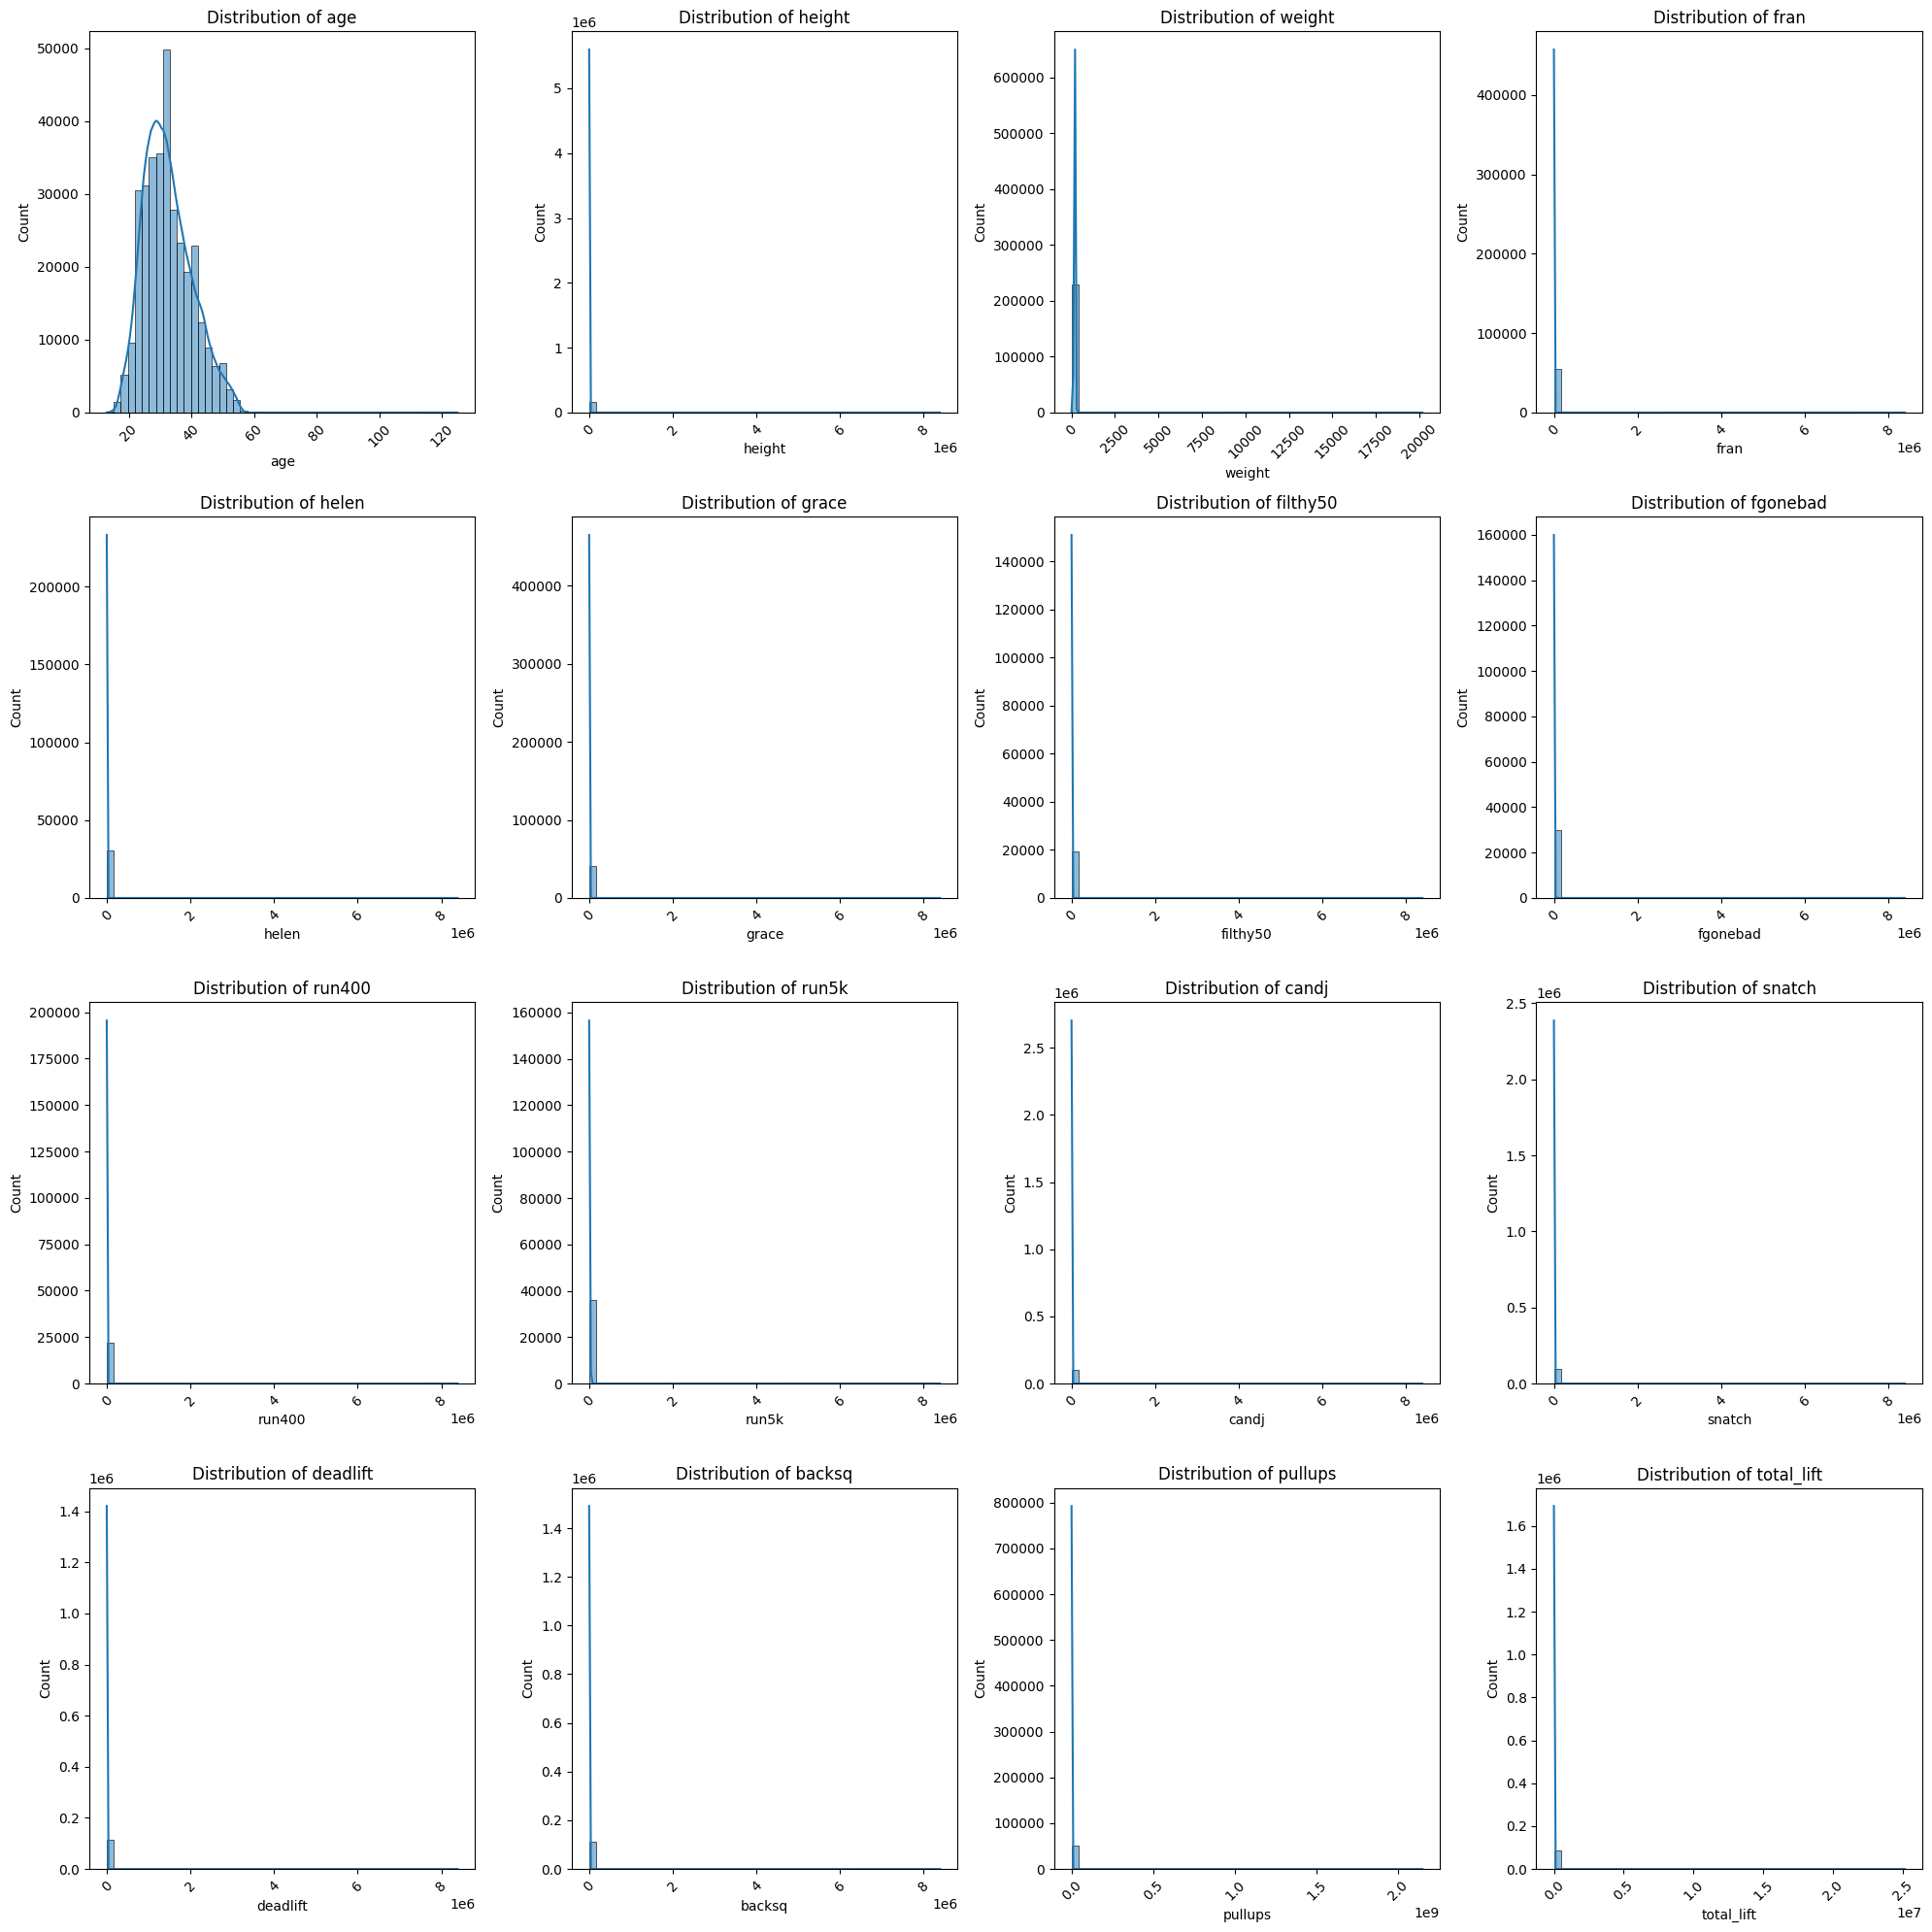

In [17]:
# Visualizing the distributions of numerical features in a 4x4 grid:
numeric_features = ['age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'total_lift']

# Set the dimensions for a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjusted figsize for a 4x4 grid
axes = axes.ravel()  # Flatten the axes

for i, feature in enumerate(numeric_features):
    sns.histplot(data_v1[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

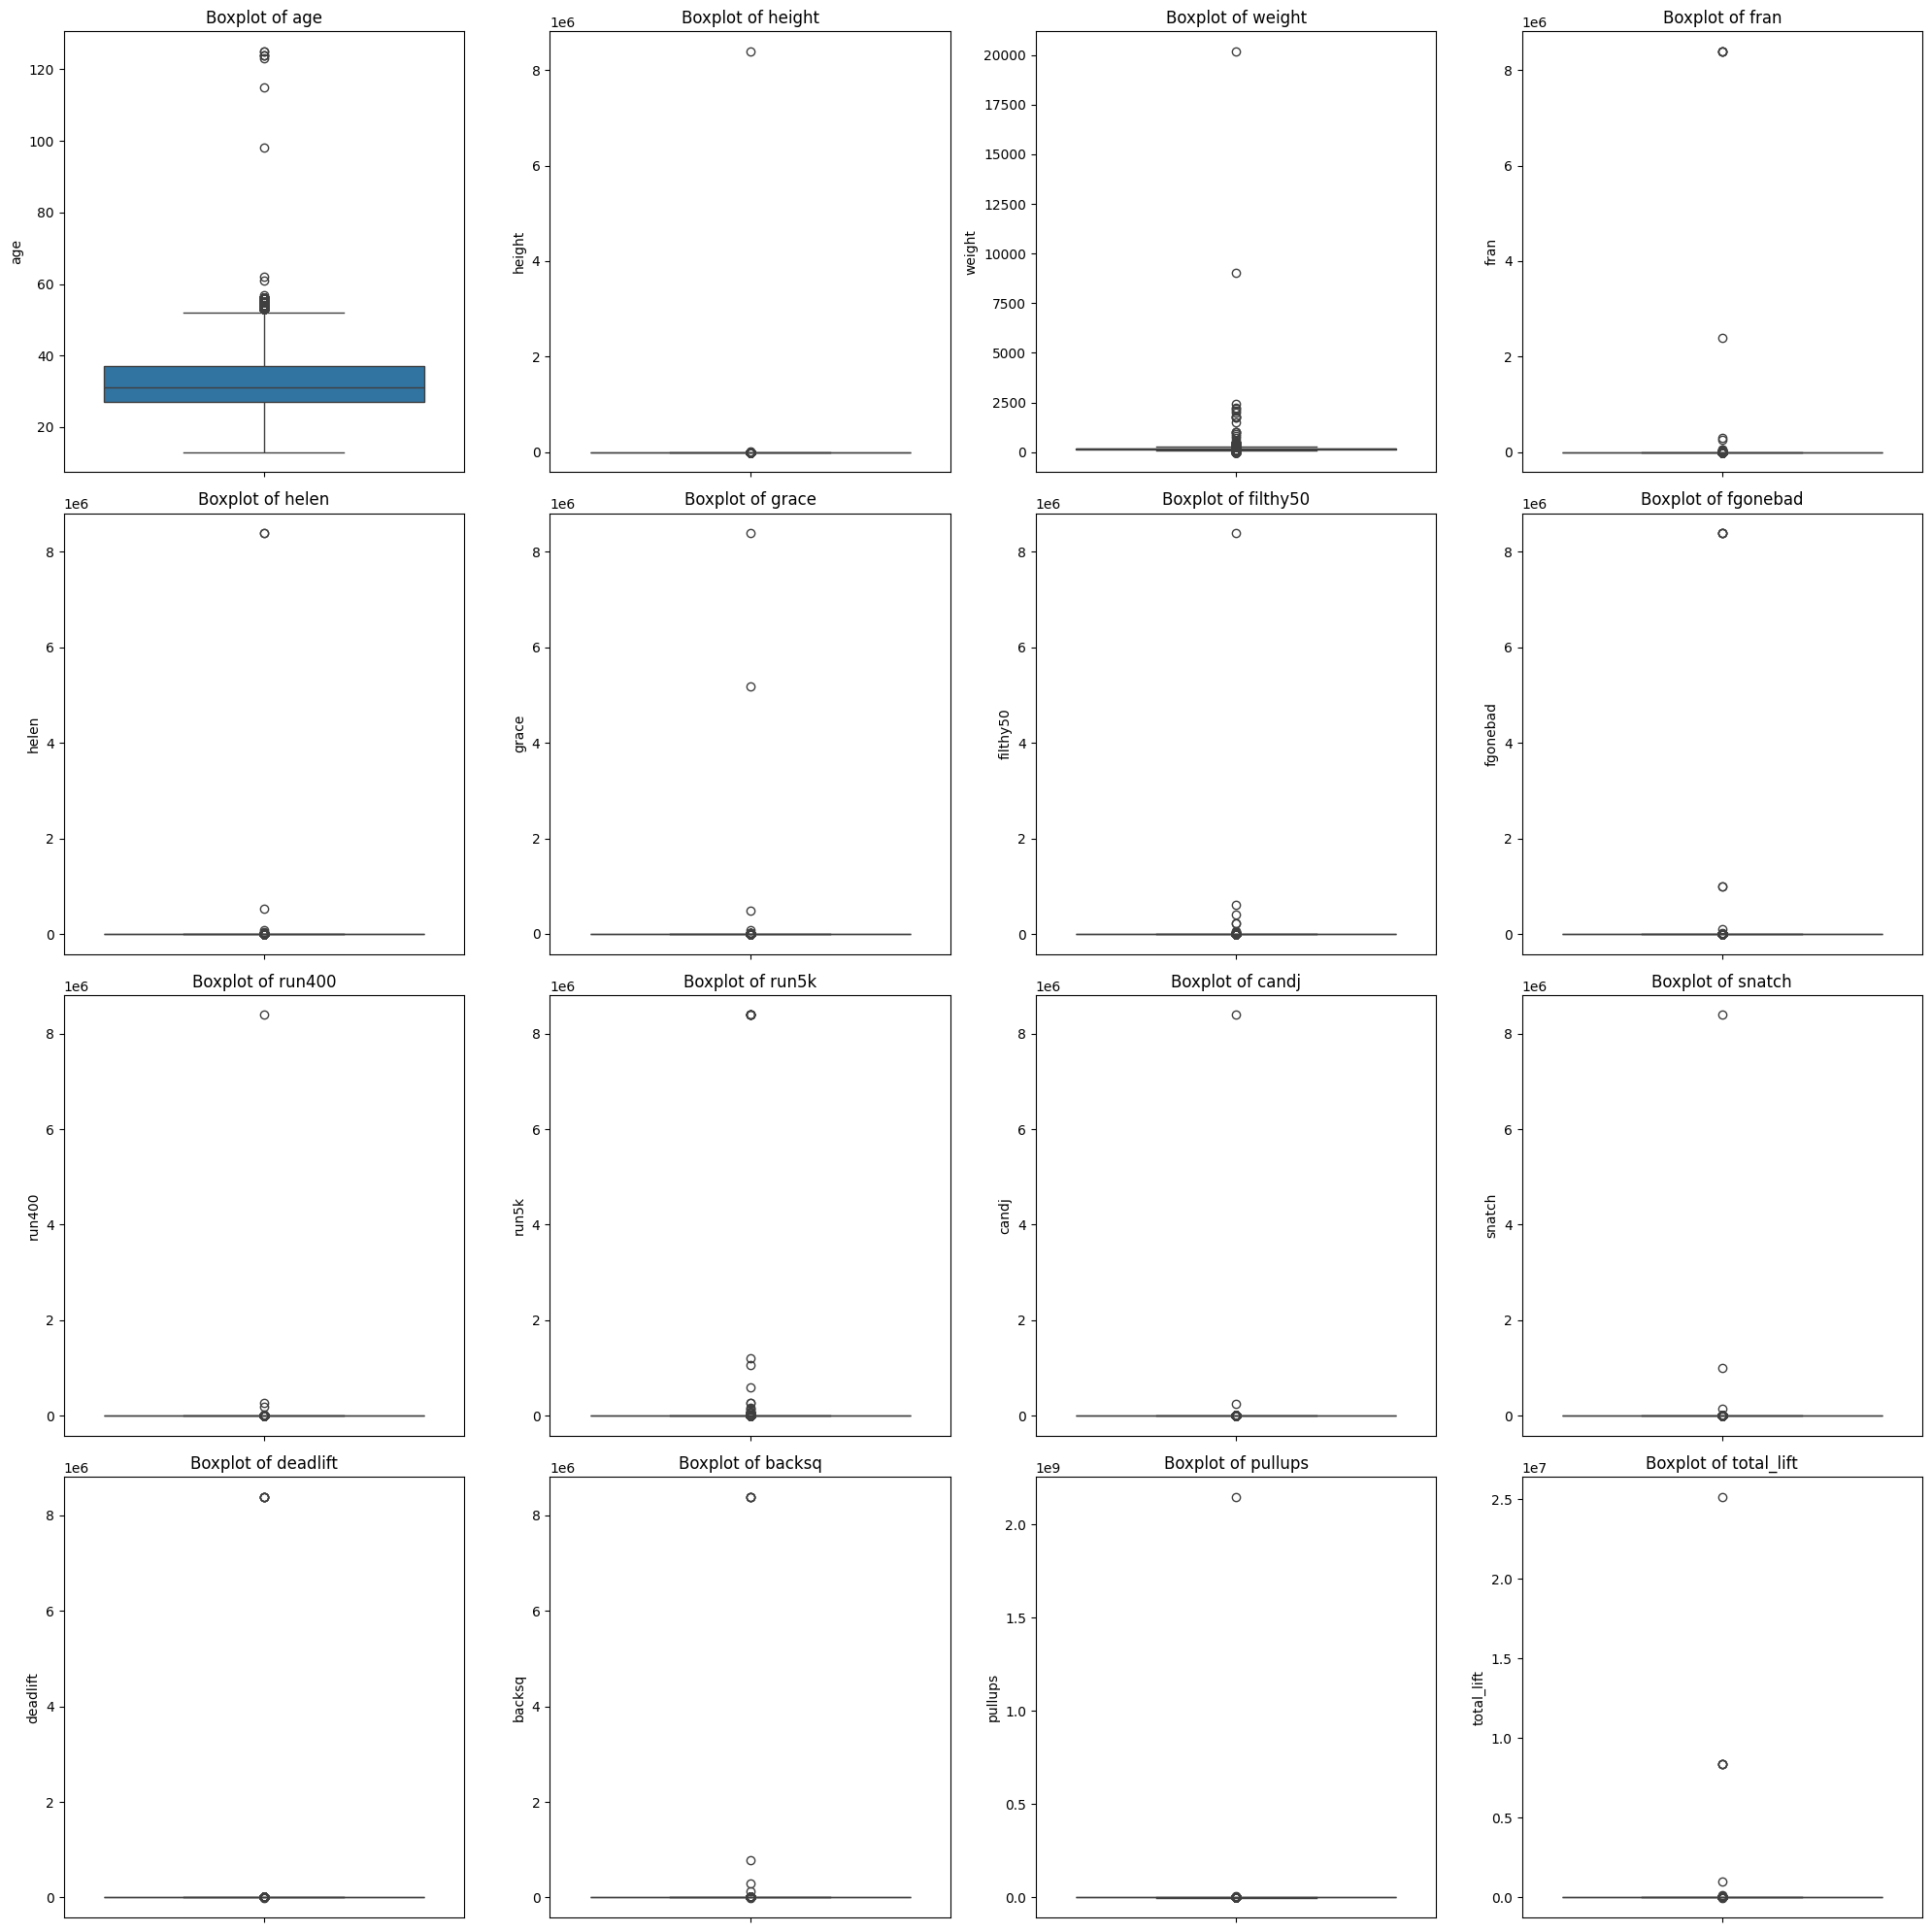

In [18]:
# Boxplots for potential outliers in a 4x4 grid:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjusted figsize for a 4x4 grid
axes = axes.ravel()  # Flatten the axes

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=data_v1[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


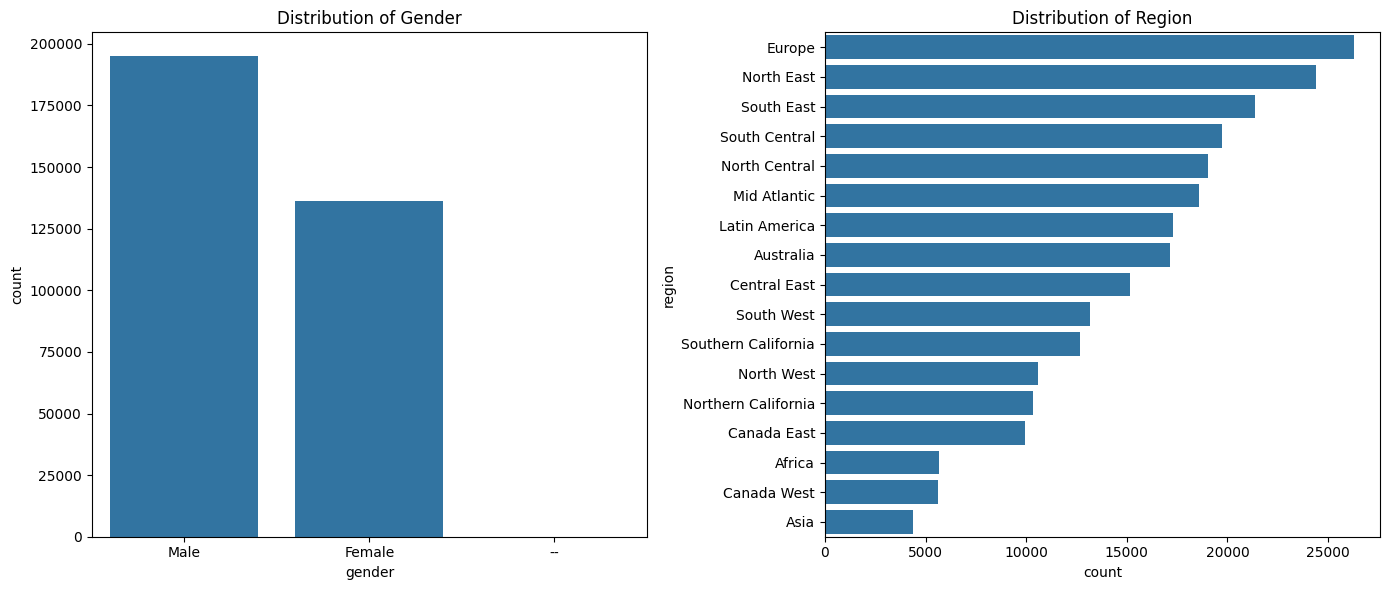

In [19]:
# Gender and Region distribution:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=data_v1, x='gender', ax=axes[0])
axes[0].set_title('Distribution of Gender')
sns.countplot(data=data_v1, y='region', order=data_v1['region'].value_counts().index, ax=axes[1])
axes[1].set_title('Distribution of Region')

plt.tight_layout()
plt.show()

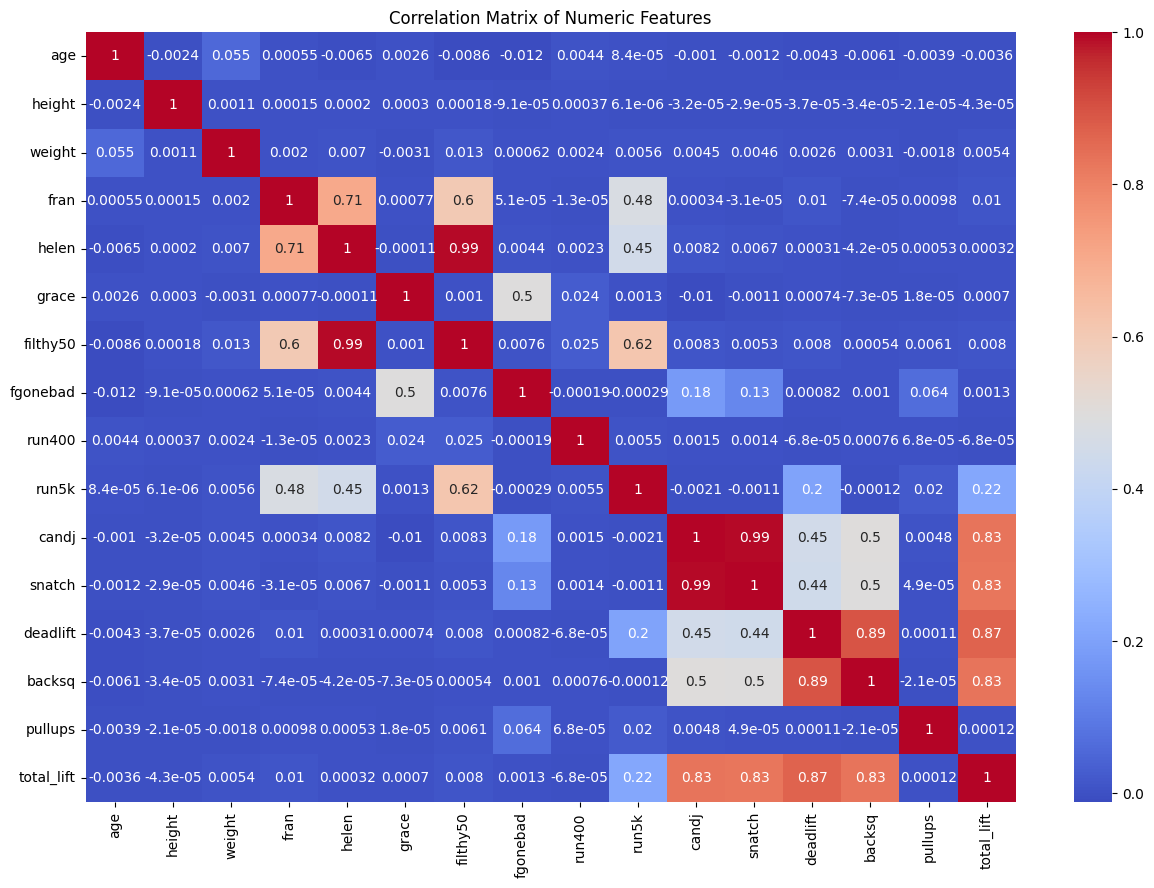

In [20]:
# Correlation matrix to understand relationships between numerical features:
corr_matrix = data_v1[numeric_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [8]:
# Pairplot for a subset of key features to identify trends:
key_features = ['age', 'height', 'weight', 'total_lift']
sns.pairplot(data_v1[key_features], height=2.5, corner=True)
plt.show()

KeyboardInterrupt: 

### 3. Baseline Model on v1:

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric and categorical features
numeric_features = ['age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups']
categorical_features = list(set(X_train_v1.columns) - set(numeric_features))

from sklearn.impute import SimpleImputer

# Preprocessing: 
# - Impute missing values
# - Standard scaling for numeric features 
# - One-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Create a pipeline with preprocessing and linear regression as the final step
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model on training data from v1
pipeline.fit(X_train_v1, y_train_v1)

# Predict on test data from v1
y_pred_v1 = pipeline.predict(X_test_v1)

# Evaluate the model's performance
mae = mean_absolute_error(y_test_v1, y_pred_v1)
mse = mean_squared_error(y_test_v1, y_pred_v1)
r2 = r2_score(y_test_v1, y_pred_v1)

print(f"Mean Absolute Error (MAE) for v1: {mae:.2f}")
print(f"Mean Squared Error (MSE) for v1: {mse:.2f}")
print(f"R^2 Score for v1: {r2:.2f}")



Mean Absolute Error (MAE) for v1: 0.90
Mean Squared Error (MSE) for v1: 3040.26
R^2 Score for v1: 0.97


/opt/homebrew/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6, 7, 8, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf


### 4. Update to v2 without Changing Code:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric and categorical features
numeric_features = ['age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups']
categorical_features = list(set(X_train_v1.columns) - set(numeric_features))

from sklearn.impute import SimpleImputer

# Preprocessing: 
# - Impute missing values
# - Standard scaling for numeric features 
# - One-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Create a pipeline with preprocessing and linear regression as the final step
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model on training data from v1
pipeline.fit(X_train_v1, y_train_v1)

# Predict on test data from v1
y_pred_v1 = pipeline.predict(X_test_v1)

# Evaluate the model's performance
mae = mean_absolute_error(y_test_v1, y_pred_v1)
mse = mean_squared_error(y_test_v1, y_pred_v1)
r2 = r2_score(y_test_v1, y_pred_v1)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


### 5. EDA on v2:

In [23]:
# Statistical Summaries:
print(data_v2.describe())

# Check for missing values:
print(data_v2.isnull().sum())

# Visualizing the distributions of numerical features in a 4x4 grid:
numeric_features_v2 = ['age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq', 'total_lift'] # Adjusted to match v2 dataset columns

                age        height        weight         candj        snatch  \
count  30029.000000  30029.000000  30029.000000  30029.000000  30029.000000   
mean      32.123847     68.871924    177.130607    205.418396    156.174198   
std        7.435425      3.774937     32.399828     58.687508     48.833572   
min       18.000000     52.000000      5.000000      1.000000      1.000000   
25%       27.000000     66.000000    155.000000    160.000000    120.000000   
50%       31.000000     69.000000    178.000000    205.000000    155.000000   
75%       37.000000     72.000000    197.000000    245.000000    190.000000   
max       56.000000     83.000000    474.000000    390.000000    386.000000   

           deadlift        backsq    total_lift  
count  30029.000000  30029.000000  30029.000000  
mean     361.933997    294.118818    723.526591  
std       96.745441     85.081340    196.660387  
min        0.000000      1.000000      3.000000  
25%      287.000000    225.000000    5

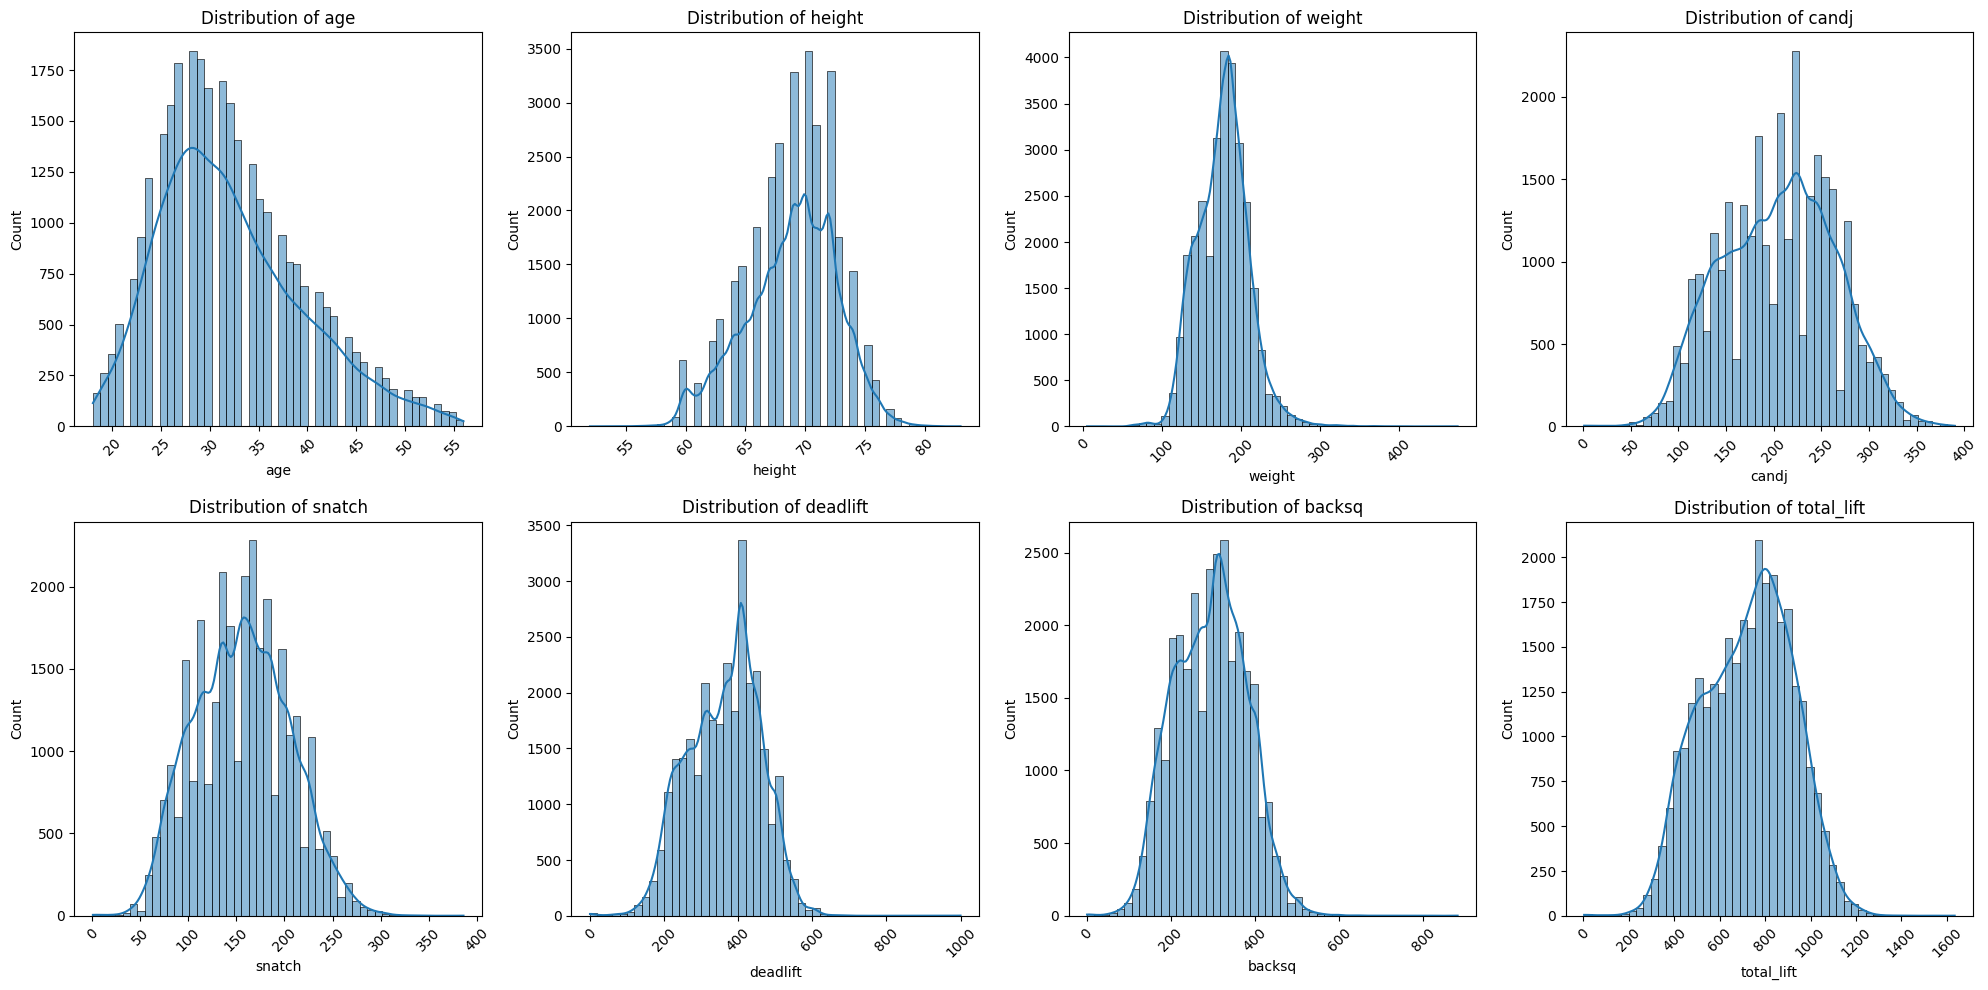

In [24]:
# Set the dimensions for a 4x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted grid size and figsize to fit the reduced numeric features
axes = axes.ravel()

for i, feature in enumerate(numeric_features_v2):
    sns.histplot(data_v2[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

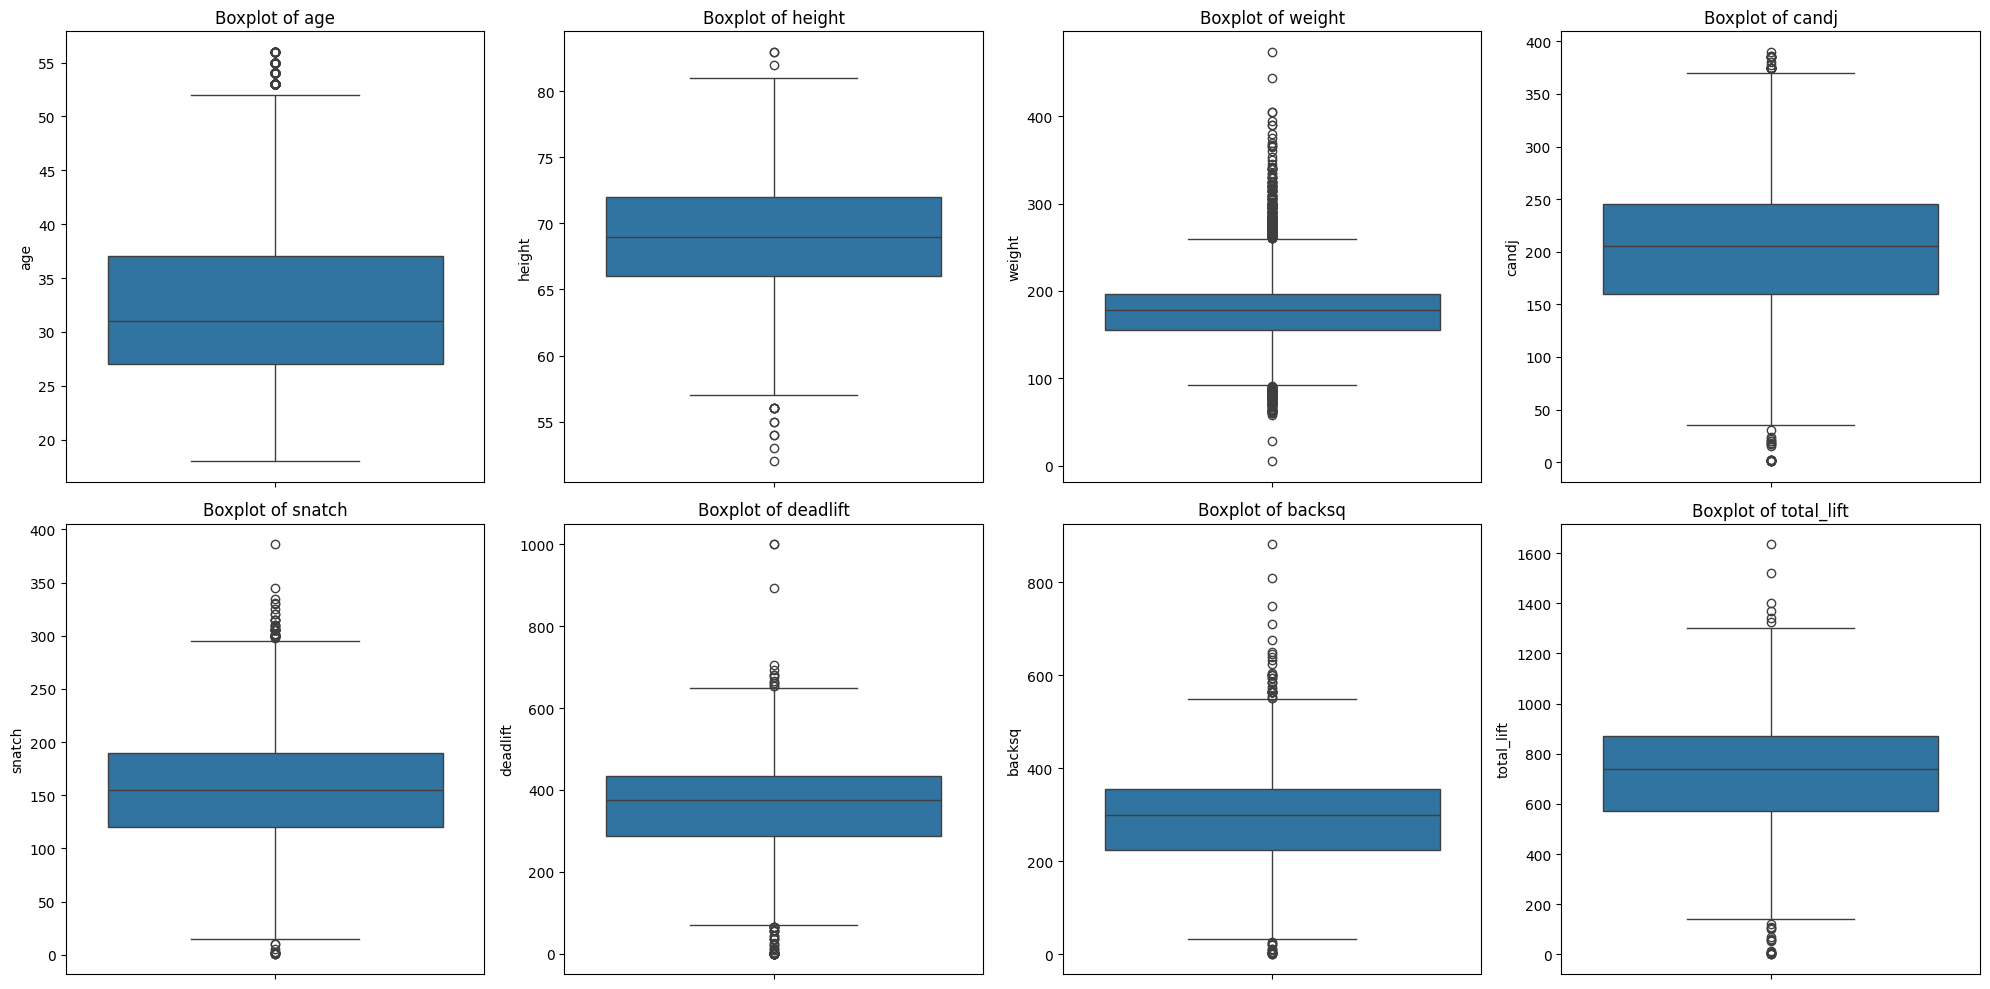

In [25]:
# Boxplots for potential outliers in a 2x4 grid:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(numeric_features_v2):
    sns.boxplot(y=data_v2[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

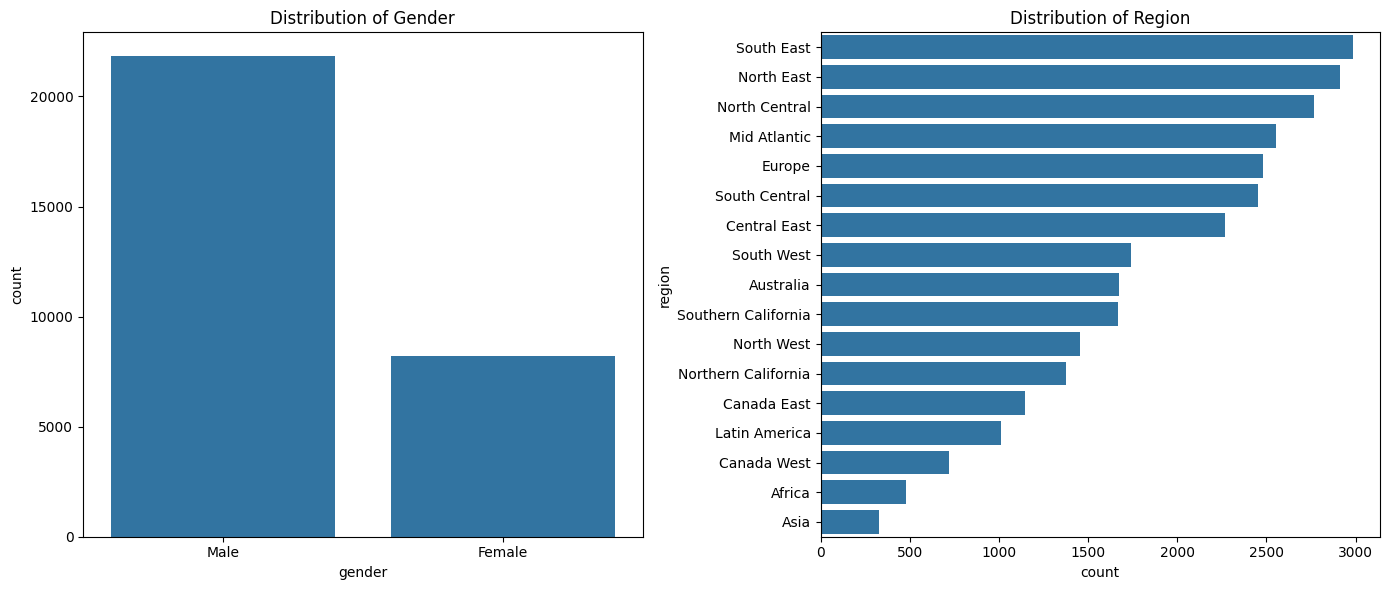

In [26]:
# Gender and Region distribution:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=data_v2, x='gender', ax=axes[0])
axes[0].set_title('Distribution of Gender')
sns.countplot(data=data_v2, y='region', order=data_v2['region'].value_counts().index, ax=axes[1])
axes[1].set_title('Distribution of Region')

plt.tight_layout()
plt.show()

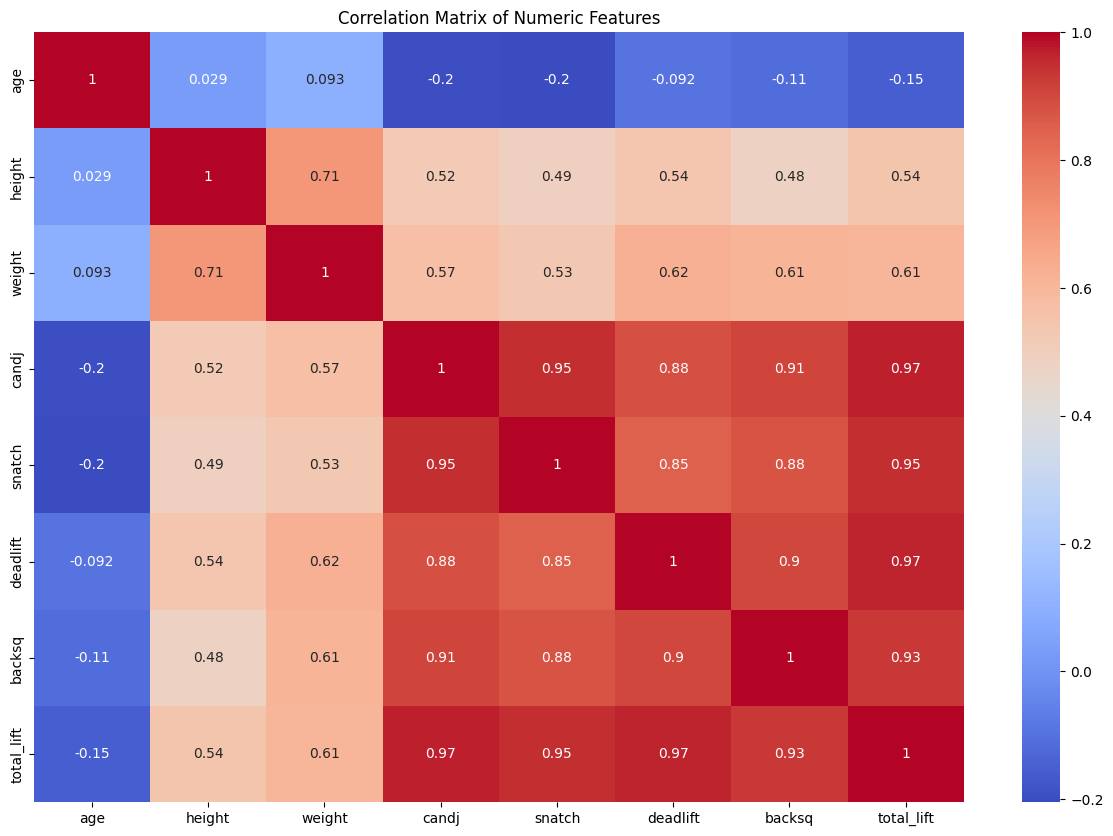

In [27]:
# Correlation matrix to understand relationships between numerical features:
corr_matrix = data_v2[numeric_features_v2].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

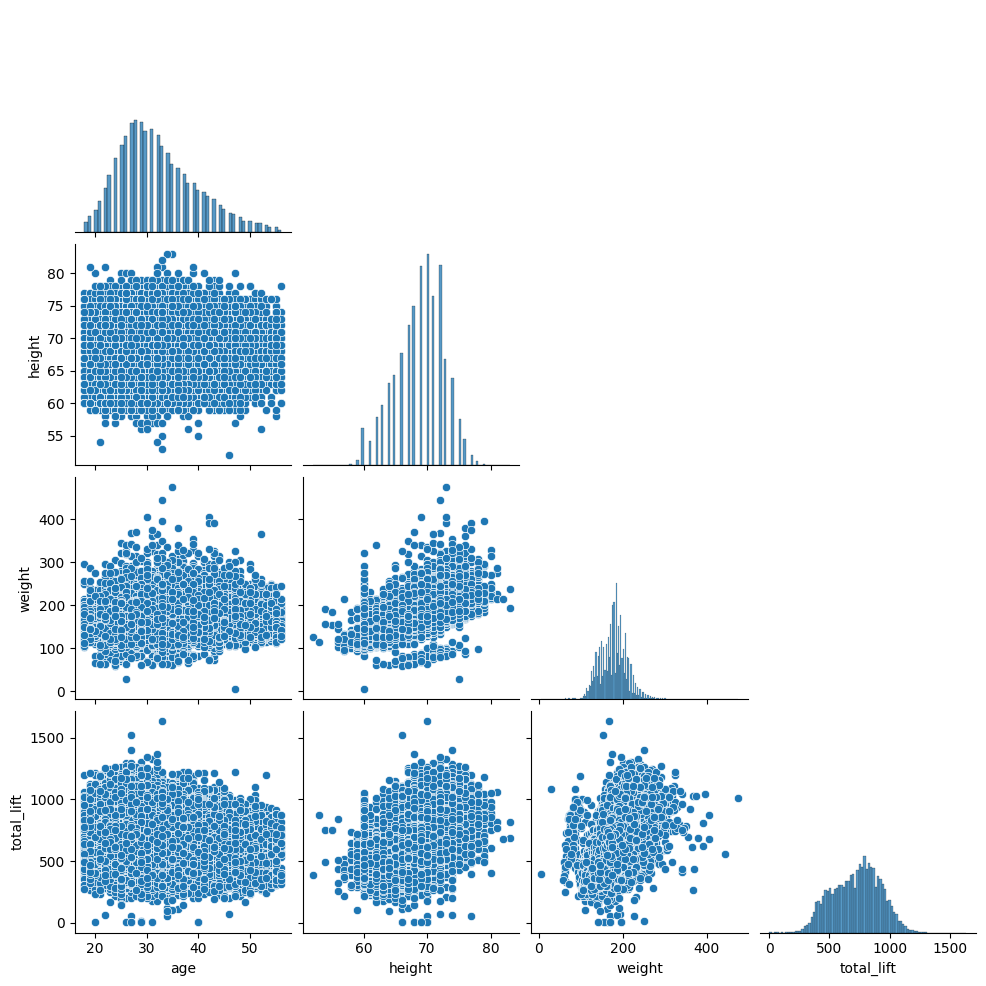

In [28]:
# Pairplot for a subset of key features to identify trends:
key_features_v2 = ['age', 'height', 'weight', 'total_lift']
sns.pairplot(data_v2[key_features_v2], height=2.5, corner=True)
plt.show()

### 6. Build ML Model with v2:

In [30]:
# Identify numeric and categorical features for v2
numeric_features_v2 = ['age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq']
categorical_features_v2 = list(set(X_train_v2.columns) - set(numeric_features_v2))

from sklearn.impute import SimpleImputer

# Preprocessing for v2: 
# - Impute missing values
# - Standard scaling for numeric features 
# - One-hot encoding for categorical features
preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features_v2),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_features_v2)
    ])

# Create a pipeline for v2 with preprocessing and linear regression as the final step
pipeline_v2 = Pipeline([
    ('preprocessor', preprocessor_v2),
    ('regressor', LinearRegression())
])

# Fit the model on training data from v2
pipeline_v2.fit(X_train_v2, y_train_v2)

# Predict on test data from v2
y_pred_v2 = pipeline_v2.predict(X_test_v2)

# Evaluate the model's performance on v2
mae_v2 = mean_absolute_error(y_test_v2, y_pred_v2)
mse_v2 = mean_squared_error(y_test_v2, y_pred_v2)
r2_v2 = r2_score(y_test_v2, y_pred_v2)

print(f"Mean Absolute Error (MAE) for v2: {mae_v2:.2f}")
print(f"Mean Squared Error (MSE) for v2: {mse_v2:.2f}")
print(f"R^2 Score for v2: {r2_v2:.2f}")

Mean Absolute Error (MAE) for v2: 0.00
Mean Squared Error (MSE) for v2: 0.00
R^2 Score for v2: 1.00


/opt/homebrew/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### 7. Compare Models v1 vs. v2:

1. Comment on accuracy and metrics differences:

Mean Absolute Error (MAE): The MAE for the model trained on v1 is 0.90, indicating on average, the predictions are off by a value of 0.90. For v2, the MAE is 0.00, which implies a perfect fit where the model's predictions exactly match the actual values.

Mean Squared Error (MSE): The MSE for v1 is 3040.26, which means the squared difference between the predicted and actual values has an average value of 3040.26. For v2, the MSE is 0.00, again indicating a perfect fit.

R^2 Score: The R^2 score for v1 is 0.97, which is already very high, suggesting that 97% of the variability in the dependent variable can be explained by the independent variables in the model. An R^2 of 1.00 for v2 means the model explains 100% of the variability, which suggests a perfect fit to the data.

2. Identify improvements or challenges:

Improvements: The model trained on v2 appears to have achieved perfect performance metrics across the board. This indicates that the new features or data preprocessing steps you've introduced in v2 have significantly improved the model's predictive capability.

Challenges:

Overfitting: While the perfect metrics for v2 suggest an impressive performance, it may also be a red flag for potential overfitting. A model that fits the training data perfectly might not necessarily generalize well to unseen data. It's essential to verify the model's performance on a separate validation or out-of-sample dataset.
Data Issues: A perfect R^2 or zero MSE is rare in real-world applications. It might be worth revisiting the data to ensure there are no issues like data leakage (where information from the test set inadvertently ends up in the training set).
Conclusion:
The v2 model undoubtedly performs better in terms of the metrics shared. However, the perfect scores warrant further investigation to ensure the robustness and generalizability of the model.

### 8. Apply TensorFlow Privacy Library to v2:

In [44]:
!python3 -m pip install --upgrade pip

In [2]:
!pip install tensorflow-privacy

  Using cached tensorflow_privacy-0.8.12-py3-none-any.whl.metadata (962 bytes)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached dm_tree-0.1.8-cp310-cp310-macosx_11_0_arm64.whl (110 kB)
  Using cached dp_accounting-0.4.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached immutabledict-2.2.5-py3-none-any.whl.metadata (3.2 kB)
  Using cached packaging-22.0-py3-none-any.whl (42 kB)
  Using cached pandas-1.5.3-cp310-cp310-macosx_11_0_arm64.whl (10.9 MB)
  Using cached statsmodels-0.14.0-cp310-cp310-macosx_11_0_arm64.whl (9.4 MB)
  Using cached tensorflow_probability-0.22.0-py2.py3-none-any.whl.metadata (13 kB)
  Using cached tf_models_official-2.14.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached Cython-3.0.3-py2.py3-none-any.whl.metada

In [37]:
import tensorflow as tf
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPAdamOptimizer

# Hyperparameters
l2_norm_clip = 1.0
noise_multiplier = 1.2
batch_size = 250
learning_rate = 0.01
epochs = 20
num_microbatches = 125  # usually batch_size should be divisible by num_microbatches

# Define your model (assuming a simple neural network for regression purposes)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_v2.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = DPAdamOptimizer(
    learning_rate=learning_rate,
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches
)

loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)

# Train the model
model.fit(X_train_v2, y_train_v2, epochs=epochs, batch_size=batch_size, validation_data=(X_test_v2, y_test_v2))


ModuleNotFoundError: No module named 'tensorflow_privacy'

### 9. Compute DP Using TensorFlow Privacy:

### 10. Compare Non-DP and DP Models on v2: